In [6]:

import pickle
import sys

sys.path.insert(1, 'functions/')
from scipy.io import loadmat
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from importlib import  reload
from read_data import read_X_depth, read_X
import utility; reload(utility)
from utility import create_folder,Figsize_scale, lowpass_filter
from scipy.io import loadmat

import os


# Read data

In [7]:
model_name = 'mbpca_individual'
data_type ='data1'
depth =0
savepath = os.path.join('./results_update_order_xw/',data_type,model_name)
filename =  model_name + '_'+data_type+'_depth'+str(depth)+'.pickle'
savefile = os.path.join(savepath,filename)
with open(savefile,'rb' ) as f:
    model = pickle.load(f)
nef =int(model.scores['nef'])
# print(nef)
# X = model.X
# plt.imshow(X,aspect='auto')
# run encoding model 
data = loadmat('./data/piezo_data1.mat')
spk_on = data['all_spk_scan']
spk_off = data['all_spk_scan_down']
speed = data['all_speed_scan']
move = data['all_move_scan']
import utility; reload(utility)
from utility import lowpass_filter
speed_filter = lowpass_filter(speed, cutoff=0.1, fs=3.86, order=2)
move_filter = lowpass_filter(move, cutoff=0.1, fs=3.86, order=2)


# illustrator_path = '/Users/yuzhe-li/Documents/Creative_cloud_files/Papers/dual_ard/encoder'



# Plot  basis functions for sound cues
## 1. Spline basis

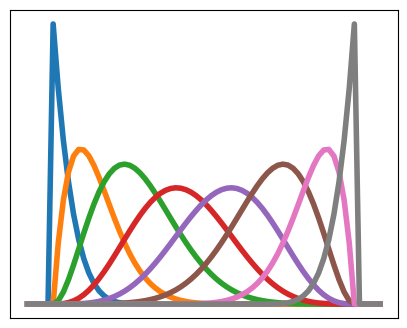

In [8]:
# For plot
import fun_encoding; reload(fun_encoding)
from fun_encoding import Encoding_model
spk_type ='spline_basis'
model = Encoding_model(spk_on, move, speed_filter, spk_type =spk_type, 
                    move_type = 'none', speed_type = 'speed_2d')
spk_phi = model.spline_basis_spk(spk_on, M = 8, tw = 60, history = 2,
                                  degree = 5)

savepath = './figs/encoder/si_glm_encoder'
# savepath = os.path.join(illustrator_path,'glm_encoder_raw_figs')

figname =spk_type+'.pdf'
figfile = os.path.join(savepath, figname)
fig, ax = plt.subplots(figsize = (5,4))
ax.plot(spk_phi[0:8,120:190].T); 
ax.set_xticks([])
ax.set_yticks([])
fig.savefig(figfile)
plt.show()

# 2. Gaussian basis

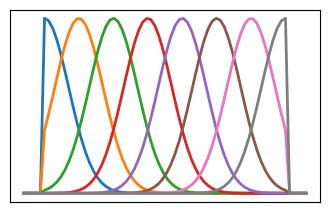

In [9]:
# For plot
spk_type ='gaussian_basis'

spk_phi = model.gaussian_basis_spk(spk_on, M = 8, tw = 60, history = 2,
                                  sigma = 0.2)

figname =spk_type+'.pdf'
figfile = os.path.join(savepath, figname)
fig, ax = plt.subplots(figsize = (4,2.5))
ax.plot(spk_phi[0:8,120:190].T, linewidth = 2); 
ax.set_xticks([])
ax.set_yticks([])
fig.savefig(figfile)
plt.show()

## 3. Stick basis

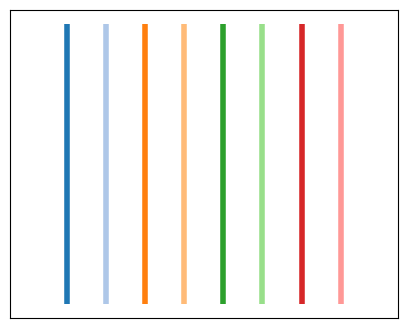

In [10]:
# For plot
spk_type ='stick_basis'
spk_phi = model.stick_basis_spk(spk_on, M = 8, tw = 8, history = 2)
import matplotlib
cmap = matplotlib.colormaps['tab20']
fig, ax = plt.subplots(figsize = (5,4))
for i in range(8):
    color = matplotlib.colors.rgb2hex(cmap(i)[:3])
    ax.stem(spk_phi[i,124:134], linefmt =color, markerfmt='none',basefmt='none')
ax.set_xticks([])
ax.set_yticks([])

figname =spk_type+'.pdf'
figfile = os.path.join(savepath, figname)
fig.savefig(figfile)
plt.show()


# plot sound cue ontime

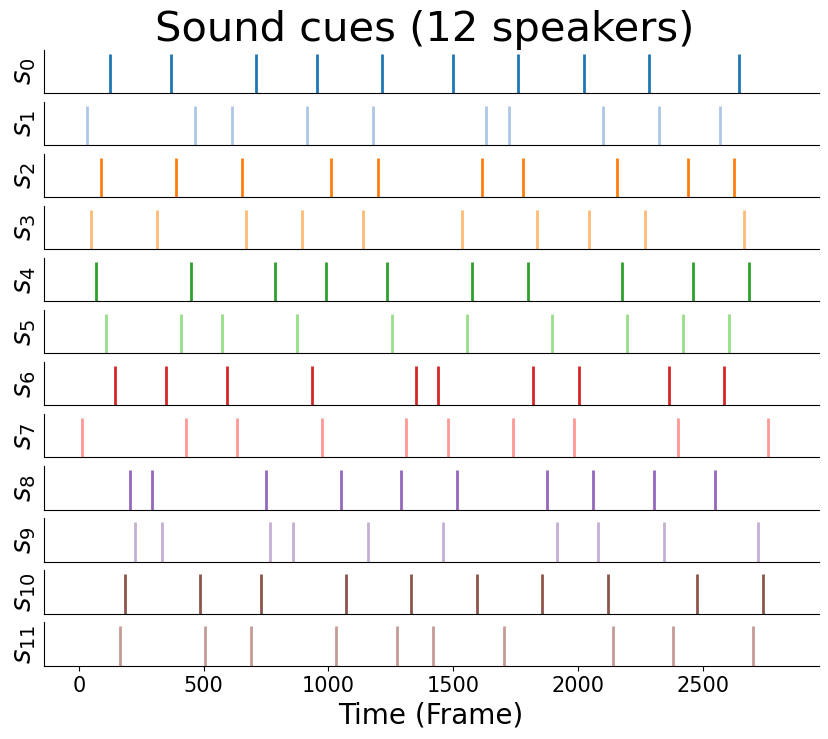

In [11]:
import matplotlib
# cmap = matplotlib.cm.get_cmap('tab20')
cmap = matplotlib.colormaps['tab20']

fig,axs =plt.subplots(12,1,figsize = (10,8))
for i in range(12):
    color = matplotlib.colors.rgb2hex(cmap(i)[:3])
    # color = 'k'
    stemi = axs[i].stem(spk_on[i,:],linefmt=color,markerfmt='none',basefmt='none')
    stemi[1].set_linewidth(2)
    axs[i].set_ylim([0,1.1])
    axs[i].spines['top'].set_visible(False)
    axs[i].spines['right'].set_visible(False)
    axs[i].set_ylabel(r'$s_{%d}$'%i)
    axs[i].set_yticks([])
    if i <11:
        axs[i].get_xaxis().set_ticks([])
axs[0].set_title('Sound cues (12 speakers) ')
axs[11].set_xlabel('Time (Frame)')

figname ='sound_cues.pdf'
figfile = os.path.join(savepath, figname)
fig.savefig(figfile)
plt.show()


# plot sound cue with basis functions

In [12]:
def plot_sound_cue_basis(spk_phi,M,N= 12, figsize = [10,8],plot_range = [0,500], linewidth = 2 ):
    from utility import Figsize_scale
    # fig,axs =plt.subplots(N,1,figsize = Figsize_scale(figsize[0],figsize[1]))
    fig,axs =plt.subplots(N,1,figsize =figsize)
    for i in range(12):
        color = matplotlib.colors.rgb2hex(cmap(i)[:3])
        axs[i].plot(spk_phi[i*M:(i+1)*M,plot_range[0]:plot_range[1]].T, linewidth = linewidth)
        axs[i].set_ylim([0,1.1])
        axs[i].spines['top'].set_visible(False)
        axs[i].spines['right'].set_visible(False)
        axs[i].set_ylabel(r'$s_{%d}$'%i)
        if i <N-1:
            axs[i].get_xaxis().set_ticks([])
    # axs[0].set_title('Sound cue times (12 speakers) ')
    axs[N-1].set_xlabel('Time (Frame)')
    # plt.show()
    return fig, axs
    


# 2.1 Spline basis 

(<Figure size 1000x800 with 12 Axes>,
 array([<Axes: ylabel='$s_{0}$'>, <Axes: ylabel='$s_{1}$'>,
        <Axes: ylabel='$s_{2}$'>, <Axes: ylabel='$s_{3}$'>,
        <Axes: ylabel='$s_{4}$'>, <Axes: ylabel='$s_{5}$'>,
        <Axes: ylabel='$s_{6}$'>, <Axes: ylabel='$s_{7}$'>,
        <Axes: ylabel='$s_{8}$'>, <Axes: ylabel='$s_{9}$'>,
        <Axes: ylabel='$s_{10}$'>,
        <Axes: xlabel='Time (Frame)', ylabel='$s_{11}$'>], dtype=object))

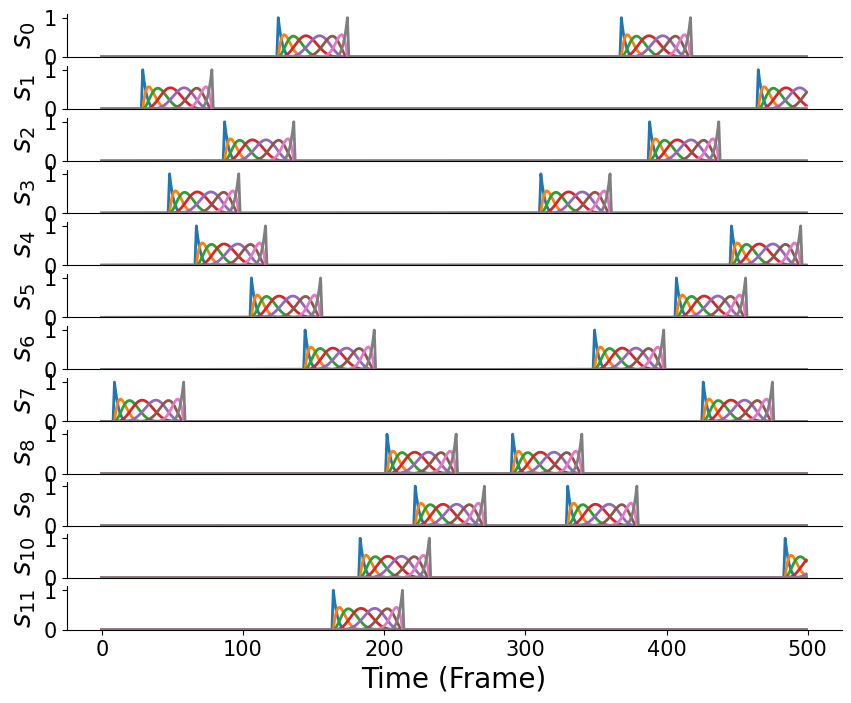

In [13]:

M = 8
tw = 50
history = 2
sigma =0.1
degree = 4

spk_type ='spline_basis'
# spk_type = 'gaussian_basis'
model = Encoding_model(spk_on, move, speed_filter, spk_type =spk_type, 
                    move_type = 'none', speed_type = 'speed_2d')
phi = model.construct_phi(spk_M = M, spk_tw = tw, spk_history = history,
                            spk_spline_basis_degree = degree,
                            spk_gaussian_basis_sigma = sigma)

spk_phi = phi[0:12*M,:]
plot_sound_cue_basis(spk_phi, M = 8, figsize = [10,8])


# 2.2 Gaussian baiss

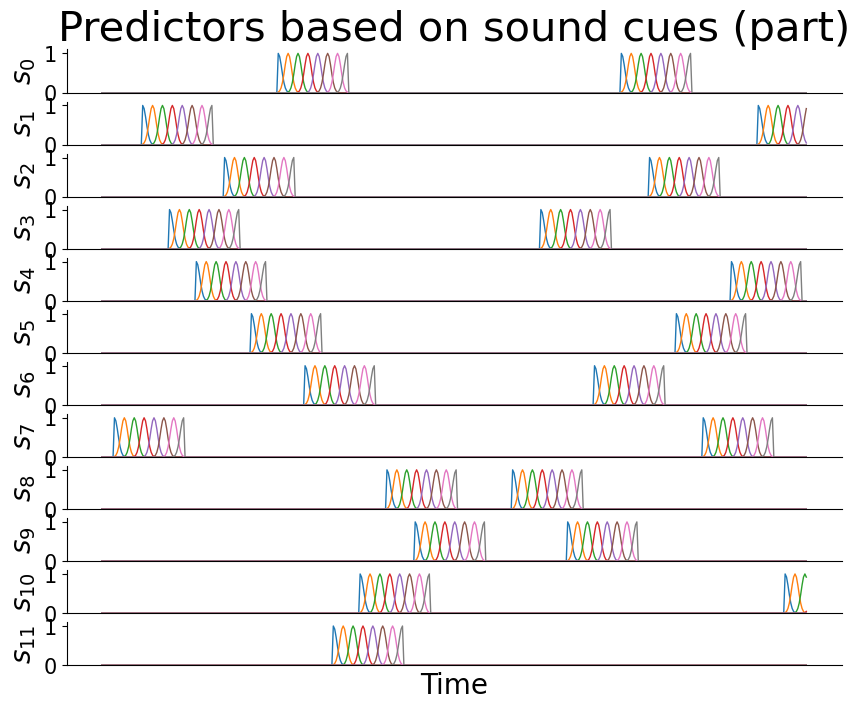

In [14]:

M = 8
tw = 50
history = 2
sigma =0.1
degree = 4

spk_type = 'gaussian_basis'
model = Encoding_model(spk_on, move, speed_filter, spk_type =spk_type, 
                    move_type = 'none', speed_type = 'speed_2d')
phi = model.construct_phi(spk_M = M, spk_tw = tw, spk_history = history,
                            spk_spline_basis_degree = degree,
                            spk_gaussian_basis_sigma = sigma)

spk_phi = phi[0:12*M,:]
fig, ax = plot_sound_cue_basis(spk_phi, M = 8, figsize = [10,8], linewidth =1)
ax[0].set_title('Predictors based on sound cues (part)')
ax[-1].set_xticks([])
ax[-1].set_xlabel('Time')
figname ='sound_cues_gaussian_basis.pdf'
figfile = os.path.join(savepath, figname)
fig.savefig(figfile)



# stick basis (not good for plotting )

(<Figure size 1000x800 with 12 Axes>,
 array([<Axes: ylabel='$s_{0}$'>, <Axes: ylabel='$s_{1}$'>,
        <Axes: ylabel='$s_{2}$'>, <Axes: ylabel='$s_{3}$'>,
        <Axes: ylabel='$s_{4}$'>, <Axes: ylabel='$s_{5}$'>,
        <Axes: ylabel='$s_{6}$'>, <Axes: ylabel='$s_{7}$'>,
        <Axes: ylabel='$s_{8}$'>, <Axes: ylabel='$s_{9}$'>,
        <Axes: ylabel='$s_{10}$'>,
        <Axes: xlabel='Time (Frame)', ylabel='$s_{11}$'>], dtype=object))

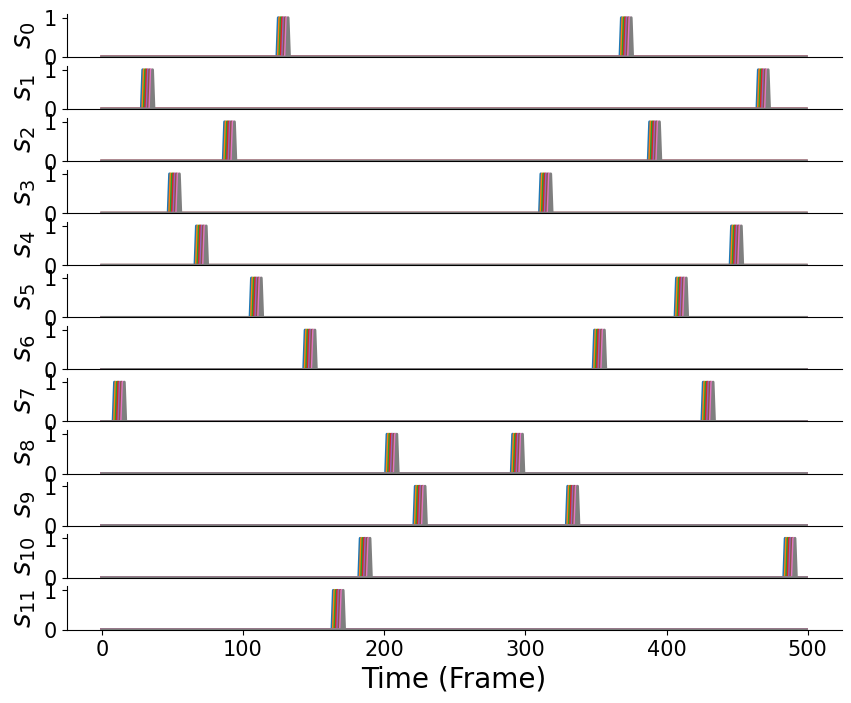

In [15]:

M = 8
tw = 50
history = 2
sigma =0.1
degree = 4
spk_type ='stick_basis'
# spk_type ='spline_basis'
# spk_type = 'gaussian_basis'
model = Encoding_model(spk_on, move, speed_filter, spk_type =spk_type, 
                    move_type = 'none', speed_type = 'speed_2d')
phi = model.construct_phi(spk_M = M, spk_tw = tw, spk_history = history,
                            spk_spline_basis_degree = degree,
                            spk_gaussian_basis_sigma = sigma)

spk_phi = phi[0:12*M,:]
plot_sound_cue_basis(spk_phi, M = 8, figsize = [10,8], plot_range=[0,500])


# II. Continouse variables

In [16]:
from scipy import stats
cutoff = 0.1
speed_eu = np.linalg.norm(speed,axis = 0)
move_eu = np.linalg.norm(move,axis = 0)
speed_filter = lowpass_filter(speed, cutoff=cutoff, fs=3.86, order=2)
speed_eu_filter = lowpass_filter(speed_eu, cutoff=cutoff, fs=3.86, order=2)
move_filter = lowpass_filter(move, cutoff=cutoff, fs=3.86, order=2)
move_eu_filter=lowpass_filter(move_eu, cutoff=cutoff, fs=3.86, order=2)
speed_zscore = stats.zscore(speed, axis =1)
speed_eu_zscore = stats.zscore(speed_eu)
speed_filter_zscore = stats.zscore(speed_filter, axis =1)
speed_eu_filter_zscore = stats.zscore(speed_eu_filter)
move_filter_zscore = stats.zscore(move_filter, axis =1)
move_eu_filter_zscore = stats.zscore(move_eu_filter)

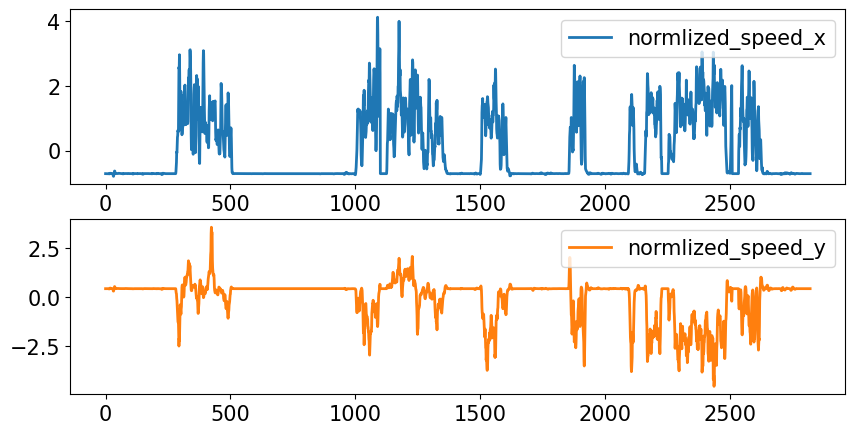

In [17]:
reload(utility)
from utility import get_cmap_ci
N = 2
fig,axs =plt.subplots(N,1,figsize = (10,N+3))

cmap = matplotlib.colormaps['tab10']

axs[0].plot(speed_zscore[0,:], label ='normlized_speed_x', color =get_cmap_ci(cmap, 0), linewidth = 2)
axs[1].plot(speed_zscore[1,:], label ='normlized_speed_y', color =get_cmap_ci(cmap, 1), linewidth = 2)
# axs[2].plot(speed_eu_zscore, label ='normlized_speed_eu', color =get_cmap_ci(cmap, 2), linewidth = 2)

# axs[3].plot(move[0,:], label ='position_x', color =get_cmap_ci(cmap, 3))
# axs[4].plot(move[1,:], label ='position_y', color =get_cmap_ci(cmap, 4))
# axs[5].plot(move_eu, label ='position_eu', color =get_cmap_ci(cmap, 5))
for i in range(N):
    axs[i].legend(loc = 'upper right')

figname ='speed.pdf'
figfile = os.path.join(savepath, figname)
fig.savefig(figfile)


plt.show()

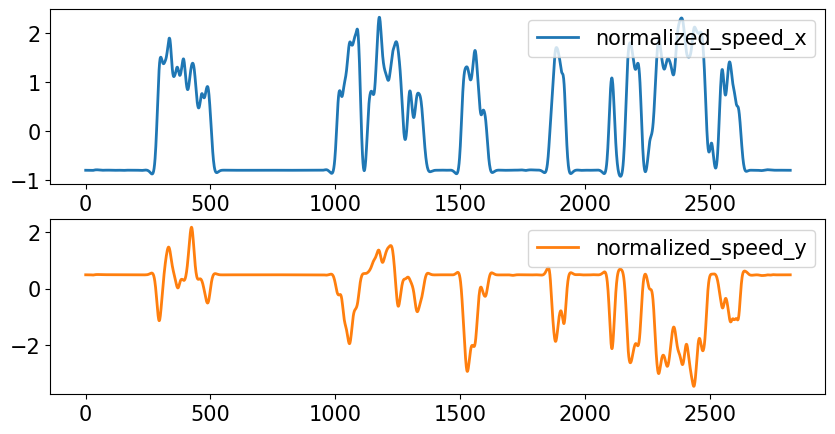

In [18]:
reload(utility)
from utility import get_cmap_ci

cmap = matplotlib.colormaps['tab10']


N = 2
fig,axs =plt.subplots(N,1,figsize = (10,N+3))

axs[0].plot(speed_filter_zscore[0,:], label ='normalized_speed_x', color =get_cmap_ci(cmap, 0), linewidth = 2)
axs[1].plot(speed_filter_zscore[1,:], label ='normalized_speed_y', color =get_cmap_ci(cmap, 1), linewidth = 2)
# axs[2].plot(speed_eu_filter_zscore, label ='normalized_speed_eu', color =get_cmap_ci(cmap, 2), linewidth = 2)

# axs[3].plot(move_filter_zscore[:,0], label ='normalized_position_x', color =get_cmap_ci(cmap, 3))
# axs[4].plot(move_filter_zscore[:,1], label ='normalized_position_y', color =get_cmap_ci(cmap, 4))
# axs[5].plot(move_eu_filter_zscore, label ='normalized_position_eu', color =get_cmap_ci(cmap, 5))
for i in range(N):
    axs[i].legend(loc = 'upper right')

figname ='speed_filter.pdf'
figfile = os.path.join(savepath, figname)
fig.savefig(figfile)

plt.show()


# plot a Schematic plot of lowpass filter

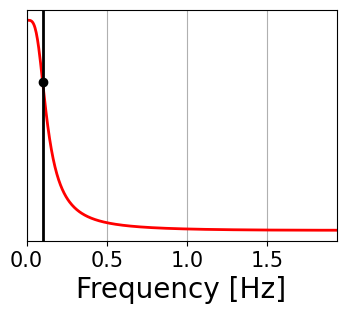

In [19]:
from scipy.signal import butter, freqz


order = 2
fs = 3.86      # sample rate, Hz
cutoff = 0.1  # desired cutoff frequency of the filter, Hz

# Get the filter coefficients so we can check its frequency response.
b, a = butter(order, cutoff, fs=fs, btype='low', analog=False)

# Plot the frequency response.
w, h = freqz(b, a, fs=fs, worN=512)

fig,ax =plt.subplots(figsize = (4,3))
ax.plot(w, np.abs(h), 'r', linewidth = 2)
ax.plot(cutoff, 0.5*np.sqrt(2), 'ko')
ax.axvline(cutoff, color='k',linewidth = 2)
ax.set_xlim(0, 0.5*fs)
ax.set_yticks([])
# ax.set_title("Lowpass Filter", fontsize = 12)
ax.set_xlabel('Frequency [Hz]')
plt.grid()

figname ='lowpass.pdf'
figfile = os.path.join(savepath, figname)
fig.savefig(figfile)
plt.show()
# print(w)

In [20]:
# plot latent varialbes clipped
result_file = './results/encoding/results_encoding_analysis.pickle'
with open(result_file,'rb') as f: 
    results_encoding_analysis=pickle.load(f)
ws = results_encoding_analysis['ws']  
y_fit = results_encoding_analysis['y_fit']
x_clips_scale = results_encoding_analysis['x_clips_scale']
phi_clips_scale = results_encoding_analysis['phi_clips_scale']

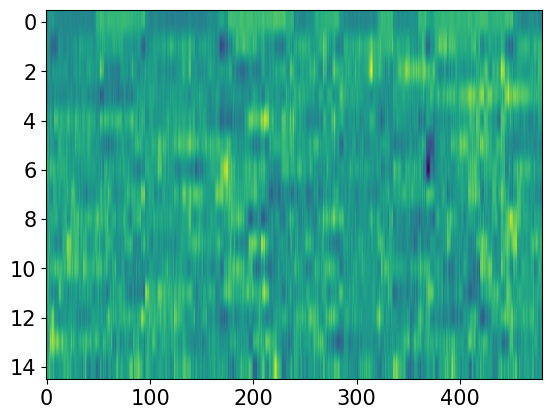

In [21]:
plt.imshow(x_clips_scale, aspect = 'auto')

In [22]:
x_clips_scale.shape

(15, 480)